# Article

Notebooks in publish is for anaylsis and graphics used in the final article. For exploration use the EDA folder.

In [1]:
import os
import sys
PROJECT_DIRECTORY = os.path.realpath(os.path.curdir)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib as plt

In [3]:
# create charts
from datawrapper import Datawrapper
from src.integration.client import create_dw_integration, get_or_create_chart

dw = Datawrapper(access_token=os.environ.get('DATAWRAPPER_API_TOKEN'))
DW_FOLDER=os.environ.get('DW_FOLDER')

## Import data

In [4]:
df = pd.read_csv("../data/processed/etl_vestland.csv")
df.municipality_id = df.municipality_id.astype(str)

## Analysis for article

In [5]:
# calculate percent change from year to year
df['pct_ch'] = (df.groupby('municipality_id')['population']
                                  .apply(pd.Series.pct_change))

In [6]:
df

,municipality_id,municipality,year,population,pct_ch
0,4601,Bergen,2001,230948,NaN
1,4601,Bergen,2002,233291,0.010145
2,4601,Bergen,2003,235423,0.009139
3,4601,Bergen,2004,237430,0.008525
4,4601,Bergen,2005,239209,0.007493
...,...,...,...,...,...
941,4651,Stryn,2018,7195,-0.003186
942,4651,Stryn,2019,7167,-0.003892
943,4651,Stryn,2020,7130,-0.005163
944,4651,Stryn,2021,7118,-0.001683


In [7]:
# Find ten year and municipality with largest drops
df.sort_values(by="pct_ch").head(10)

,municipality_id,municipality,year,population,pct_ch
222,4619,Eidfjord,2003,915,-0.045881
545,4633,Fedje,2018,561,-0.044293
549,4633,Fedje,2022,502,-0.043810
548,4633,Fedje,2021,525,-0.041971
221,4619,Eidfjord,2002,959,-0.041958
633,4637,Hyllestad,2018,1378,-0.041725
535,4633,Fedje,2008,596,-0.038710
556,4634,Masfjorden,2007,1631,-0.036621
533,4633,Fedje,2006,638,-0.034796
41,4602,Kinn,2020,17207,-0.034508


## Graphs for article

<AxesSubplot:xlabel='year'>

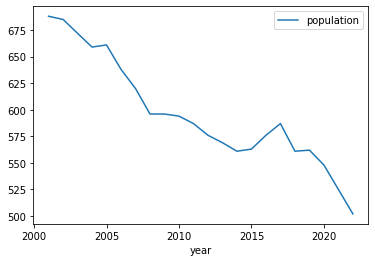

In [8]:
# Create graph for Fedje
df[df.municipality_id == "4633"].plot(x="year", y="population")

## Use Datawrapper to create graph

In [9]:
integration_key = "fedje"
chart_id = get_or_create_chart(dw, integration_key, title='Befolkningsutvikling i Fedje-kommune 2001–2022', chart_type = 'd3-lines', folder_id = DW_FOLDER)

New chart d3-lines created!
Chart and integration does not exist. Creating with DW id: Fj9xY


In [10]:
metadata = dw.chart_properties(chart_id)['metadata']
    
if not "colorscale" in metadata['visualize']:
    metadata['visualize']['colorscale'] = {}

metadata['visualize']['colorscale']['colors'] = [{'color': '#f0f0f0', 'position': 0}] 
    

if not "legend" in metadata['visualize']:
    metadata['visualize']['legend'] = {}

metadata['visualize']['legend']['title'] = 'Antall innbyggere'

dw.update_metadata(chart_id, metadata)

#Add new data
dw.add_data(chart_id, df[df.municipality_id == "4633"][["year", "population"]])

#Update chart title
dw.update_chart(chart_id)

Chart's metadata updated!
Chart with id Fj9xY updated!


/Users/Lasse.Lambrechts@bt.no/.local/share/virtualenvs/b-tsZOx-c4/lib/python3.8/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Create integrations

In [11]:
#Create or update integration
create_dw_integration(dw, integration_key, chart_id)

fedje https://api.schibsted.tech/proxy/content/v3/publication/bt/multimedias/76a8ce7b-1182-4d19-b426-d4c2aec55546


True